In [ ]:
import os
from datetime import datetime, timedelta
import pandas as pd
from twelvedata import TDClient


# --- Configuration ---
API_KEY = ''   # ← replace with your Twelve Data API key
OUTPUT_DIR = "./data"        # directory where CSVs will go
SYMBOLS   = ["EUR/USD", "XAU/USD"]
INTERVALS = ["1min", "5min", "15min", "30min", "1h"]
DAYS      = 90                   # how many days of data back (≈2 months)

# --- Create client ---
td = TDClient(apikey=API_KEY)

# --- Ensure output directory exists ---
os.makedirs(OUTPUT_DIR, exist_ok=True)

# --- Date ranges ---
end_date   = datetime.utcnow()
start_date = end_date - timedelta(days=DAYS)

start_str  = start_date.strftime("%Y-%m-%d %H:%M:%S")
end_str    = end_date.strftime("%Y-%m-%d %H:%M:%S")

print(f"Requesting data from {start_str} to {end_str}")

# --- Download loop ---
for symbol in SYMBOLS:
    for interval in INTERVALS:
        print(f"Downloading {symbol} @ interval {interval}")
        try:
            ts = td.time_series(
                symbol     = symbol,
                interval   = interval,
                start_date = start_str,
                end_date   = end_str,
                timezone   = "UTC",
                outputsize = 5000   # high number, will truncate by date anyway
            )
            df = ts.as_pandas()
            
            # Clean up / make sure datetime index
            if "datetime" in df.columns:
                df.set_index("datetime", inplace=True)
            
            # Save to CSV
            fname = f"{symbol.replace('/','')}_{interval}.csv"
            path  = os.path.join(OUTPUT_DIR, fname)
            df.to_csv(path)
            print(f"Saved to {path}, rows = {len(df)}")
            
        except Exception as e:
            print(f"ERROR for {symbol} @ {interval} → {e}")

print("Done.")


Requesting data from 2025-08-03 00:50:56 to 2025-11-01 00:50:56
Saved to ./data/EURUSD_1min.csv, rows = 5000
Saved to ./data/EURUSD_5min.csv, rows = 5000
Saved to ./data/EURUSD_15min.csv, rows = 5000
Saved to ./data/EURUSD_30min.csv, rows = 3112
Saved to ./data/EURUSD_1h.csv, rows = 1560
Saved to ./data/XAUUSD_1min.csv, rows = 5000
Saved to ./data/XAUUSD_5min.csv, rows = 5000
Saved to ./data/XAUUSD_15min.csv, rows = 5000
Saved to ./data/XAUUSD_30min.csv, rows = 3517
Saved to ./data/XAUUSD_1h.csv, rows = 1765
Done.


Matplotlib created a temporary cache directory at /tmp/matplotlib-rz0esudm because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


                       open    high     low   close
datetime                                           
2025-10-31 21:42:00  1.1535  1.1535  1.1535  1.1535
2025-10-31 21:40:00  1.1535  1.1535  1.1535  1.1535
2025-10-31 21:39:00  1.1535  1.1535  1.1535  1.1535
2025-10-31 21:37:00  1.1535  1.1535  1.1535  1.1535
2025-10-31 21:35:00  1.1535  1.1535  1.1535  1.1535


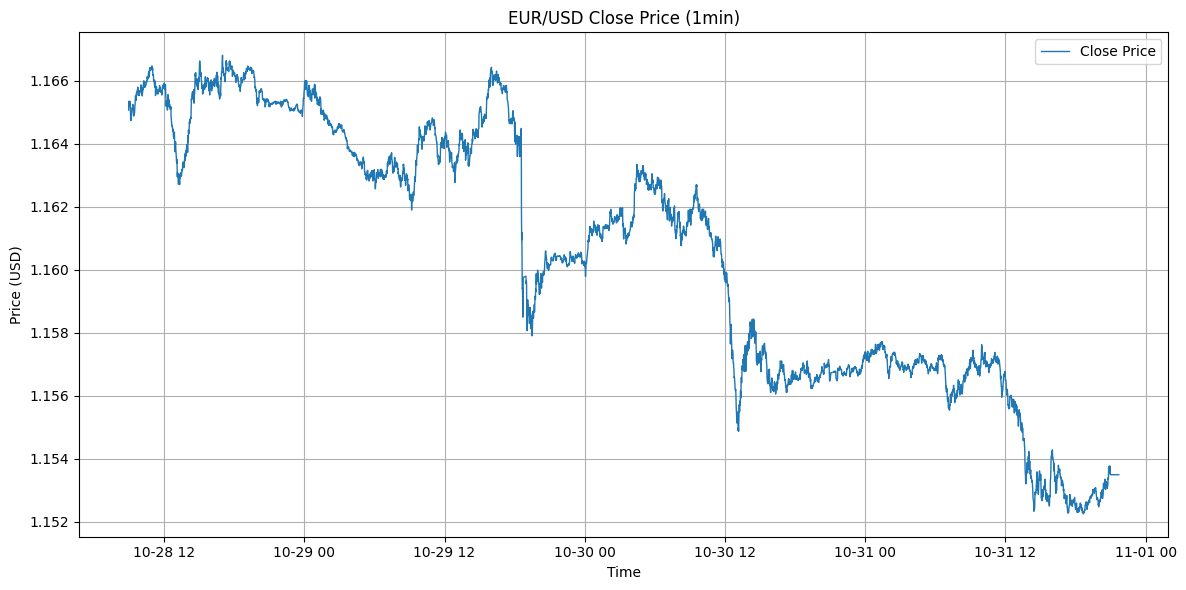

In [7]:
import matplotlib.pyplot as plt
# --- Load the CSV file ---
# Replace with your filename, e.g. "data_tw12/EURUSD_1min.csv"
file_path = "data/EURUSD_1min.csv"

# Try to automatically detect date column
df = pd.read_csv(file_path, parse_dates=True, index_col=0)

# If the index isn't datetime, convert manually
if not pd.api.types.is_datetime64_any_dtype(df.index):
    df.index = pd.to_datetime(df.index)

print(df.head())

# --- Plot the Close price ---
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["close"], label="Close Price", linewidth=1)
plt.title("EUR/USD Close Price (1min)")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
